In [1]:
#indian_liver_patient

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("F:/dlk_data/indian_liver_patient.csv")

In [4]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


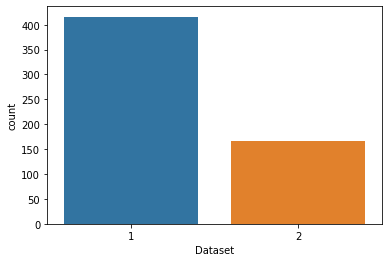

In [5]:
sns.countplot(data['Dataset'])

In [6]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data['Gender'] = lb_make.fit_transform(data['Gender'])

data['Gender'].head()

0    0
1    1
2    1
3    1
4    1
Name: Gender, dtype: int32

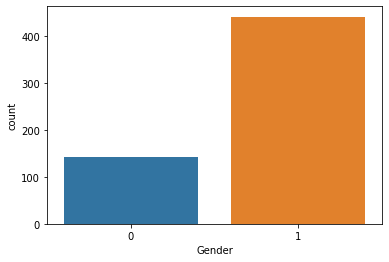

In [7]:
sns.countplot(data['Gender'])

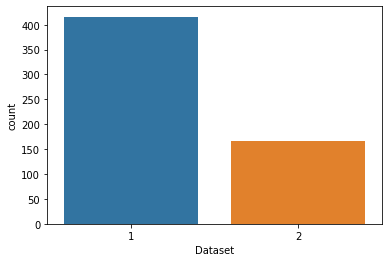

In [8]:
sns.countplot(data['Dataset'])

In [9]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [10]:

data = data.drop_duplicates()
print( data.shape )

(570, 11)


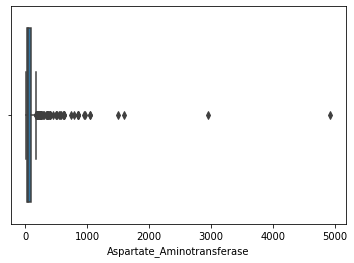

In [11]:
sns.boxplot(data.Aspartate_Aminotransferase)

In [12]:
data.Aspartate_Aminotransferase.sort_values(ascending=False).head(7)

135    4929
117    2946
118    1600
207    1500
119    1050
199    1050
47      960
Name: Aspartate_Aminotransferase, dtype: int64

In [13]:
data = data[data.Aspartate_Aminotransferase <=3000 ]
data.shape

(569, 11)

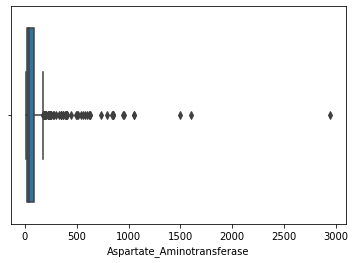

In [14]:
sns.boxplot(data.Aspartate_Aminotransferase)

In [15]:
data.Aspartate_Aminotransferase.sort_values(ascending=False).head(7)

117    2946
118    1600
207    1500
199    1050
119    1050
47      960
97      950
Name: Aspartate_Aminotransferase, dtype: int64

In [16]:

data = data[data.Aspartate_Aminotransferase <=2500 ]
data.shape

(568, 11)

In [17]:
data.isnull().values.any()

True

In [18]:
data=data.dropna(how='any')

In [19]:
data.shape

(564, 11)

In [20]:
# machine learning Method

In [21]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [22]:
x.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [23]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [26]:
x_train

array([[ 0.27383832,  0.56367167, -0.42741227, ..., -1.44330817,
        -0.96778334, -0.16136061],
       [-0.69761738,  0.56367167, -0.33581562, ...,  0.44845304,
        -0.20440669, -0.78618697],
       [-0.27260551, -1.77408242, -0.38161395, ...,  1.11056946,
         0.43174052, -0.47377379],
       ...,
       [ 1.42744197, -1.77408242, -0.42741227, ..., -1.82166041,
        -1.34947166, -0.47377379],
       [ 1.24529402,  0.56367167, -0.35108173, ...,  0.44845304,
         0.94065828,  0.77587892],
       [ 0.0309744 ,  0.56367167, -0.15262233, ..., -1.34872011,
        -0.71332446,  0.15105256]])

In [27]:
y_train.shape

(394,)

In [28]:
x_test.shape

(170, 10)

In [29]:
y_test.shape

(170,)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         564 non-null    int64  
 1   Gender                      564 non-null    int32  
 2   Total_Bilirubin             564 non-null    float64
 3   Direct_Bilirubin            564 non-null    float64
 4   Alkaline_Phosphotase        564 non-null    int64  
 5   Alamine_Aminotransferase    564 non-null    int64  
 6   Aspartate_Aminotransferase  564 non-null    int64  
 7   Total_Protiens              564 non-null    float64
 8   Albumin                     564 non-null    float64
 9   Albumin_and_Globulin_Ratio  564 non-null    float64
 10  Dataset                     564 non-null    int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 50.7 KB


# LogisticRegression

In [31]:
from sklearn.linear_model import LogisticRegression  
model = LogisticRegression(random_state=0)  
model.fit(x_train, y_train)  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_train_pred = model.predict(x_train)

In [33]:
y_pred = model.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,y_pred)
cf

array([[117,   9],
       [ 34,  10]], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
print(ac)

0.7470588235294118


# RANDOM FOREST

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [37]:
y_pred = classifier.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[111  15]
 [ 33  11]]


In [39]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
print(ac)

0.7176470588235294


# SVM

In [40]:
from sklearn.svm import SVC
classifier = SVC(kernel= 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [41]:
ypred = classifier.predict(x_test)

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred)
print(cm)

[[126   0]
 [ 44   0]]


In [43]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,ypred)
print(ac)

0.7411764705882353


# XGBOOST

In [44]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:17:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [45]:
ypred = xg.predict(x_test)

In [46]:
cm = confusion_matrix(y_test, ypred)
print(cm)

[[102  24]
 [ 26  18]]


In [47]:
ac = accuracy_score(y_test,ypred)
print(ac)

0.7058823529411765


# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [49]:
ypred = xg.predict(x_test)

In [50]:
cm = confusion_matrix(y_test, ypred)
print(cm)

[[102  24]
 [ 26  18]]


In [51]:
ac = accuracy_score(y_test,ypred)
print(ac)

0.7058823529411765


In [52]:
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()

# applying streamlit

In [53]:
# !pip install streamlit

In [54]:

!pip install pyngrok

!pip install streamlit

!pip install streamlit_ace

You should consider upgrading via the 'c:\users\user\anaconda3\pythonw.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\anaconda3\pythonw.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\anaconda3\pythonw.exe -m pip install --upgrade pip' command.


In [55]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import math
from sklearn.preprocessing import LabelEncoder
import streamlit as st
st.title('Project- liver disease prediction using machine learning')


info = pd.read_csv('F:/dlk_data/indian_liver_patient.csv')
info.head()
info.isna().sum() # Albumin_and_Globulin_Ratio    4 filling with mean()

info['Albumin_and_Globulin_Ratio'].isna().sum()
info['Albumin_and_Globulin_Ratio'].fillna(info['Albumin_and_Globulin_Ratio'].median(),inplace=True)
# info.isna().sum()

lb_make = LabelEncoder()
info['Gender'] = lb_make.fit_transform(info['Gender'])

# info.info() # info

dt = tree.DecisionTreeClassifier()
# X = 
st.title("Indormation / Data sets information")
st.write(info.columns)


# In[38]:


#  rename 
info.rename(columns ={'Dataset':'Target'},inplace=True)
info.columns


# # In[81]:


X = info.drop('Target',axis=1)
y = info['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
st.title('Algorithm')
st.write(dt.fit(X_train,y_train))

# # dt.predict([[1,1,1,1,1,1,1,1,1,1]])
# # testing
# '''
# Age', 'sex', 'Total_Bilirubin', 'Direct_Bilirubin',
#        'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
#        'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
#        'Albumin_and_Globulin_Ratio'
# '''
st.title("Making predections...")

Sex = st.text_input("Entre your Sex (male = 1 and female = 2)")  # 1
age = st.text_input("Entre your age   ") # 2 
Total_Bilirubin = st.text_input("Entre your Total_Bilirubin >  ") # 3
Direct_Bilirubin = st.text_input("Entre your Direct_Bilirubin >  ")# 4
Alkaline_Phosphotase = st.text_input("Entre your Alkaline_Phosphotase >  ") # 5
Alamine_Aminotransferase = st.text_input("Entre your Alamine_Aminotransferase >  ") # 6
Aspartate_Aminotransferase = st.text_input("Entre your Aspartate_Aminotransferase >  ") # 7
Total_Protiens = st.text_input("Entre your Total_Protiens >  ")# 8
Albumin = st.text_input("Entre your Albumin >  ") # 9
Albumin_and_Globulin_Rati = st.text_input("Entre your Albumin_and_Globulin_Ratio >  ") # 10 

st.write(info.astype(int).info())

if st.button('Submit'):
    results = dt.predict([[Sex,age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase
                      ,Total_Protiens,Albumin,Albumin_and_Globulin_Rati]])
    
    st.title('Check for Results')
    st.title('Predection')
    for final in results:
        if final == 1:
            st.write('\n you have a Liver Disease')
        else:
            st.write(' you do not have a Liver Disease')






# '''

# news = str(input())
# st.title('Make Predections')
# predection = st.text_area('Make Predections')
# # st.title('Make Predections')
# print(manual_testing(news))
# st.write(predection)
# '''

2021-08-12 12:17:46.493 
  command:

    streamlit run C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         583 non-null    int32
 1   Gender                      583 non-null    int32
 2   Total_Bilirubin             583 non-null    int32
 3   Direct_Bilirubin            583 non-null    int32
 4   Alkaline_Phosphotase        583 non-null    int32
 5   Alamine_Aminotransferase    583 non-null    int32
 6   Aspartate_Aminotransferase  583 non-null    int32
 7   Total_Protiens              583 non-null    int32
 8   Albumin                     583 non-null    int32
 9   Albumin_and_Globulin_Ratio  583 non-null    int32
 10  Target                      583 non-null    int32
dtypes: int32(11)
memory usage: 25.2 KB
